In [6]:
# Import necessary libraries
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load your Euro Cup dataset (assuming it's in a CSV file named 'euro_cup_data.csv')
df = pd.read_csv(r'euro_cup_winner_matches.csv')

# Selecting a subset of relevant features for clustering
selected_features = ['winner_goals', 'other_team_goals', 'year']

# Create a new DataFrame with only the selected features
df_selected = df[selected_features].copy()

# Drop rows with missing values, if any
df_selected.dropna(inplace=True)

# Keep a copy of original winner_goals and other_team_goals
df_selected['original_winner_goals'] = df_selected['winner_goals']
df_selected['original_other_team_goals'] = df_selected['other_team_goals']



In [7]:

# Normalize numerical features using StandardScaler
scaler = StandardScaler()
df_selected[selected_features] = scaler.fit_transform(df_selected[selected_features])

In [8]:
# Perform K-means clustering (assuming 5 clusters for demonstration)
kmeans = KMeans(n_clusters=3, random_state=42)
df_selected['cluster'] = kmeans.fit_predict(df_selected[selected_features])

# Analyze the clusters
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_centers_df = pd.DataFrame(cluster_centers, columns=selected_features)




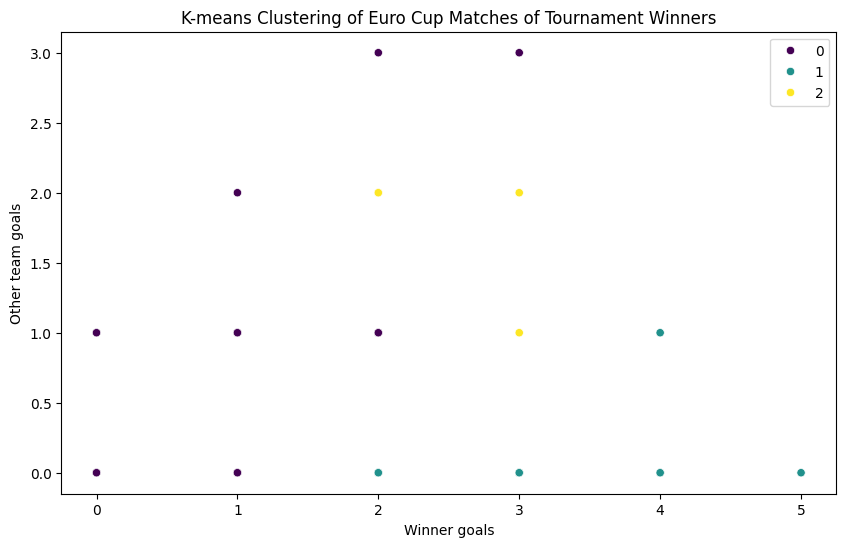

In [9]:
# Visualize clusters using original home_score and away_score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='original_winner_goals', y='original_other_team_goals', data=df_selected, hue='cluster', palette='viridis', legend='full')
plt.title('K-means Clustering of Euro Cup Matches of Tournament Winners')
plt.xlabel('Winner goals')
plt.ylabel('Other team goals')
plt.legend()
plt.show()
